## Lab0

this time is the first time for Signal and system experiment,as follows are my solution to labs.

we can easily solve the function we wanna to focus on, while before that, we need to import the library into our lab. this is a very important stage, for this we can go on the next stage.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath 
import math
import time
%matplotlib inline

Please define the function you wanna talk about before you use the codes

In [2]:
def fun(x):
    E = 1
    wid = 0.5
    if abs(x) < wid:
        return E
    else:
        return 0    
    
def Fun(w):
    E = 1
    wid = 0.5
    rv = 2 * E * wid * Sa(w * wid)
    if np.isnan(rv).any():
        has_nan = np.isnan(rv)
        rv[has_nan] = 0
        
    return rv
def Sa(x):
    return np.sin(x) / x


we need to define the sampling numbers as follows
- N is the times we need to sample from time domain to frequency domain
- K is the times we need to sample from frquency domain to time domain

In [3]:
N = 500              
K = 1000
pi = 3.14159267

### Loop Calculation for FT(fourier transform)

In [4]:
def func1_FT(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    rv = []
    for k in range(K):
        tot = complex(0, 0)
        w_now = w1 + deltW * k
        for n in range(N):
            t_now = t1 + n * deltT
            tot += fun(t_now) * cmath.exp(complex(0, - t_now * w_now))
        tot = tot * (t2 - t1) / N
        rv.append(tot)
    return rv

### Vector Product for FT

In [5]:
def func2_FT(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    rv = []
    
    
    f = np.arange(0, N, 1)
    f = t1 + f * deltT
    fun_vec = np.vectorize(fun)
    f = fun_vec(f)
    
    for k in range(K):
        w_now = w1 + k * deltW
        a = np.arange(0, N, 1)
        a = t1 + a * deltT
        a = np.exp(-w_now * complex(0, 1) * a)
        tot = (t2 - t1) / N * np.dot(a, f.T)
        rv.append(tot)
    return rv

### Matrix Product for FT

In [6]:
def func3_FT(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    
    f = np.arange(0, N, 1)
    f = t1 + f * deltT
    fun_vec = np.vectorize(fun)
    f = fun_vec(f)
    
    w = np.arange(0, K, 1)
    w = w1 + w * deltW
    w.shape = (1,K)
    t = np.arange(0, N, 1)
    t = t1 + t * deltT
    a = np.kron(w.T, t)
    a = np.exp(- a * complex(0, 1))
    
    rv = (t2 - t1) / N * np.dot(a, f.T)
    return rv

## Matrix Product for IFT

In [7]:
def func3_IFT(t1, t2, w1, w2):
    deltT = (t2 - t1) / N 
    deltW = (w2 - w1) / K
    
    F = np.arange(0, K, 1)
    F = w1 + F * deltW
    F = Fun(F)
    
    w = np.arange(0, K, 1)
    w = w1 + w * deltW
    w.shape = (1,K)
    t = np.arange(0, N, 1)
    t = t1 + t * deltT
    t.shape = (1,N)
    a = np.kron(t.T, w)
    a = np.real(np.exp(a * complex(0, 1)))
    
    rv = (w2 - w1) / (2 * pi * K) * a.dot(F.T)
    return rv

## Final problem

Regctangular pulse

$$
    f(t) = \left\{
    \begin{matrix}
        E, & x < \tau \\
        0, &otherwise
    \end{matrix}
    \right.
$$
with $E = 1$ and $\tau = \frac{1}{2}$ Set the sampling numbers N = 500 and K = 1000

1. Plot $f(t), t \in [-1,1]$

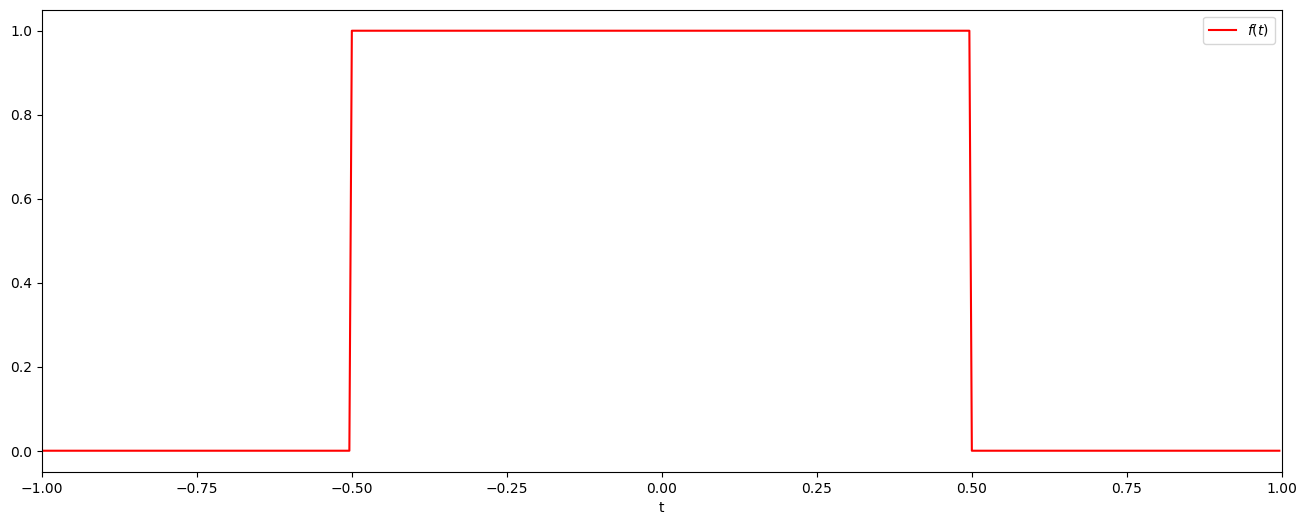

In [8]:
n_t = np.arange(-1, 1, 2 / N)
fun_vec = np.vectorize(fun)
n_ft = fun_vec(n_t)

plt.figure(figsize = (16, 6))
plt.plot(n_t, n_ft, color = 'r', label = '$f(t)$')
plt.xlim([-1.0, 1.0])
plt.xlabel('t')
plt.legend()
plt.show()

2. Plot $F(\omega), \omega \in [-8\pi, 8\pi]$

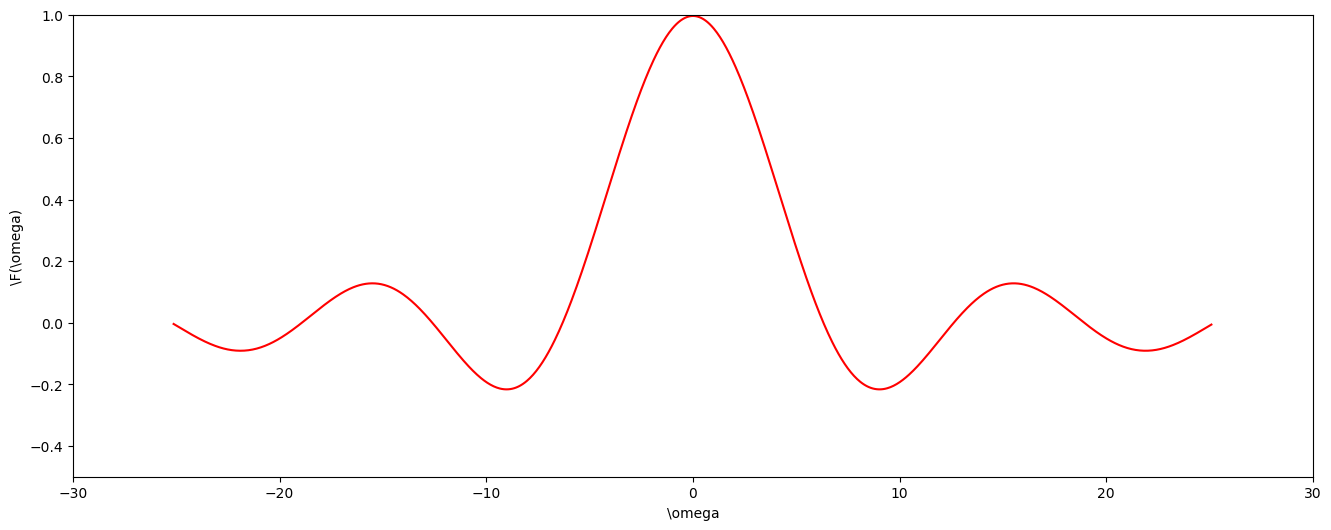

In [9]:
F_fun1 = func1_FT(-1 ,1, -8 * pi, 8 * pi)
F_fun1 = np.real(F_fun1)
n = np.arange(-8*pi, 8*pi, (16*pi) / K)
plt.figure(figsize = (16, 6))
plt.plot(n, F_fun1, color = 'r')
plt.xlim([-30, 30])
plt.ylim([-0.5, 1])
plt.xlabel('\omega')
plt.ylabel('\F(\omega)')
plt.show()

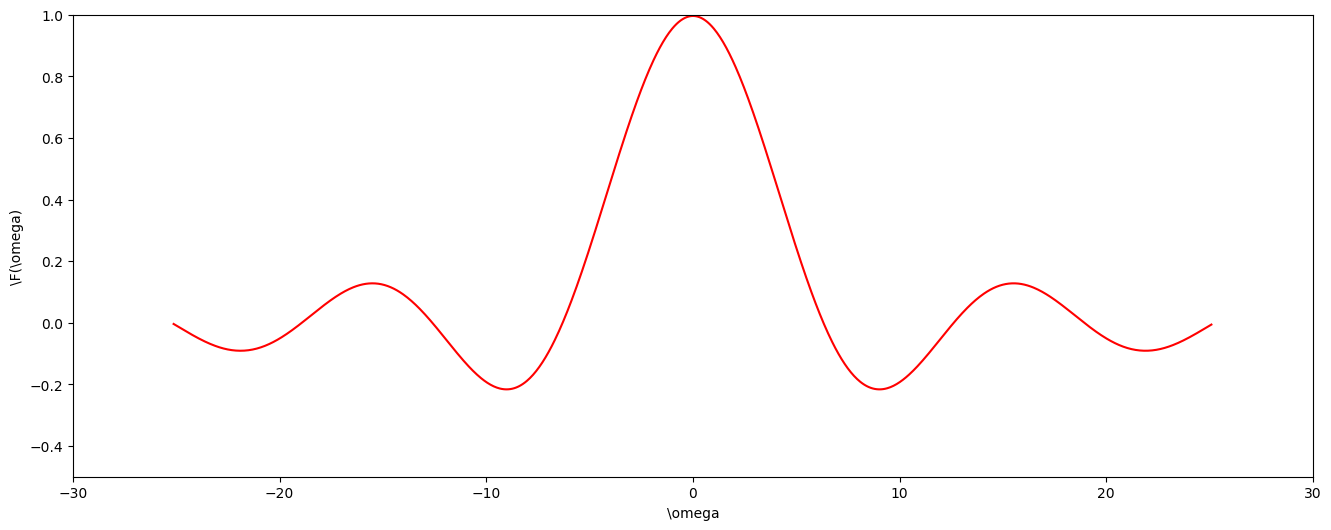

In [10]:
F_fun2 = func2_FT(-1 ,1, -8 * pi, 8 * pi)
F_fun2 = np.real(F_fun2)
n = np.arange(-8*pi, 8*pi, (16*pi) / K)
plt.figure(figsize = (16, 6))
plt.plot(n, F_fun2, color = 'r')
plt.xlim([-30, 30])
plt.ylim([-0.5, 1])
plt.xlabel('\omega')
plt.ylabel('\F(\omega)')
plt.show()

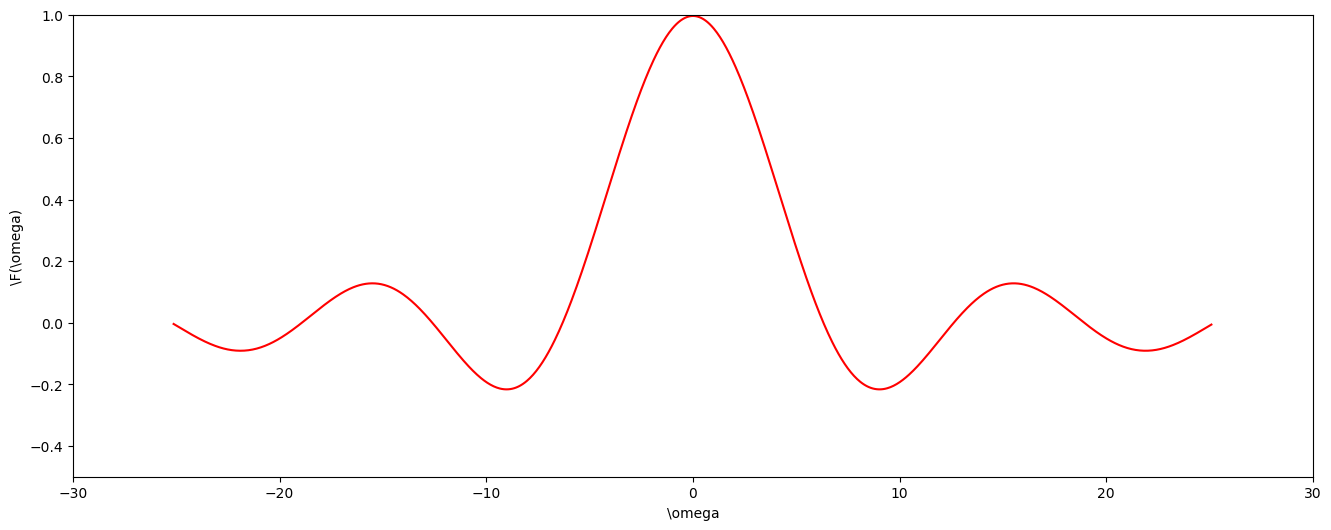

In [11]:
F_fun3 = func3_FT(-1 ,1, -8 * pi, 8 * pi)
F_fun3 = np.real(F_fun3)
n = np.arange(-8*pi, 8*pi, (16*pi) / K)
plt.figure(figsize = (16, 6))
plt.plot(n, F_fun3, color = 'r')
plt.xlim([-30, 30])
plt.ylim([-0.5, 1])
plt.xlabel('\omega')
plt.ylabel('\F(\omega)')
plt.show()

3. Compare the time costs of 3 methods

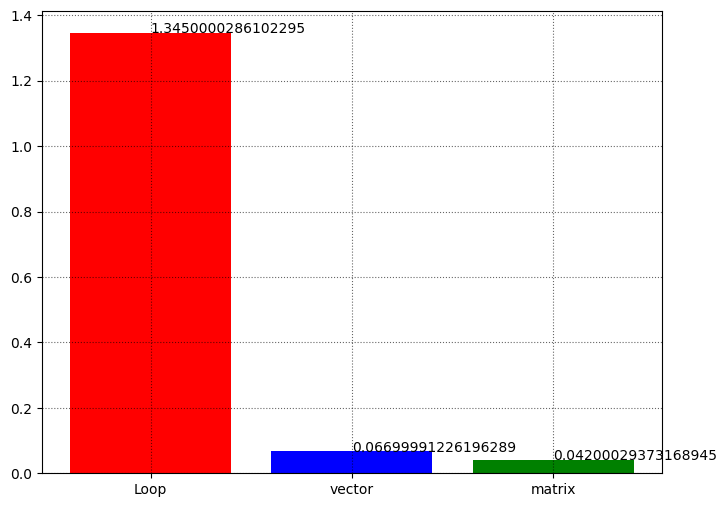

In [12]:
t1_s = time.time()
F_fun1 = func1_FT(-1 ,1, -8 * pi, 8 * pi)
t1_e = time.time()
t1 = t1_e - t1_s

t2_s = time.time()
F_fun2 = func2_FT(-1 ,1, -8 * pi, 8 * pi)
t2_e = time.time()
t2 = t2_e - t2_s

t3_s = time.time()
F_fun3 = func3_FT(-1 ,1, -8 * pi, 8 * pi)
t3_e = time.time()
t3 = t3_e - t3_s

categorylist = ['Loop', 'vector', 'matrix']
timelist = [t1, t2, t3]
color = ['red', 'blue', 'green']
plt.figure(figsize = (8, 6))
plt.bar(categorylist, timelist, color = color)
plt.grid(True,linestyle=':',color='black',alpha=0.6)
for i in range(3):
    plt.text(categorylist[i], timelist[i], timelist[i])
plt.show()

4. Recover $f(t) $ from  $F(\omega)$

    define the $F(\omega)$ and use it for the reverse transform

<Figure size 1600x600 with 0 Axes>

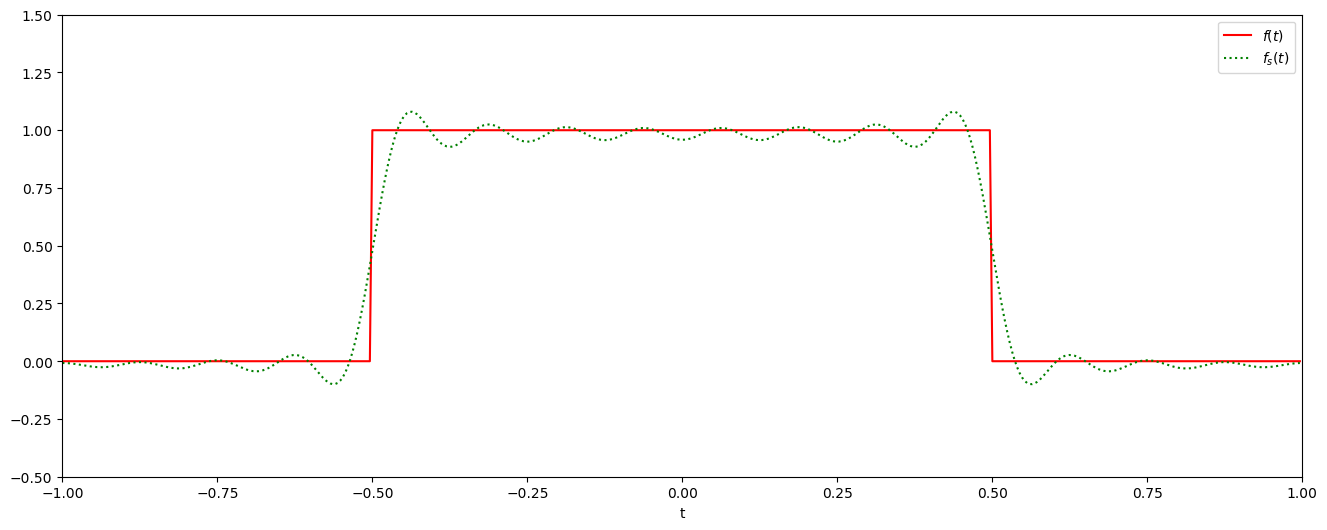

In [13]:
f_Fun3 = func3_IFT(-1, 1, - 16 * pi, 16 * pi)
plt.figure(figsize = (16, 6))
n_t = np.arange(-1, 1, 2 / N)
fun_vec = np.vectorize(fun)
n_ft = fun_vec(n_t)

plt.figure(figsize = (16,6))
plt.plot(n_t, n_ft, color = 'r', label = '$f(t)$')
plt.plot(n_t, f_Fun3, color = 'g', linestyle = ':', label = '$f_s(t)$')
plt.xlabel('t')
plt.xlim([-1, 1])
plt.ylim([-0.5, 1.5])
plt.legend()
plt.show()

5. Observe the Gibbs Phenomenon.

    we can easily find when the function is at some non-continuous function, the reverse function is not as smooth as the original function.
    

As all the above, the lab0 is over!